In [1]:
import os
import re
import uproot
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (5, 3)

In [2]:
# o stands for "old"
# ofname = os.path.expandvars("$HOME/Software/WCSimFQTuningTools/Charge/old_tools/")
fname  = os.path.expandvars("$HOME/Software/WCSimFQTuningTools/Charge/charge2D_and_unhit.root")

# of = uproot.open(ofname)
f  = uproot.open(fname)

In [3]:
f.classnames()

{'charge2D;1': 'TH2D', 'PUnhit;1': 'TGraph', 'hPunhitPar_type0;1': 'TH1D'}

In [4]:
# read 2D histogram
Hq, mubins, qbins = f["charge2D"].to_numpy()
# unhit probability
mus, PUnhit = f["PUnhit"].values()
# get PUnhit fit parameters
pars, _ = f["hPunhitPar_type0"].to_numpy()

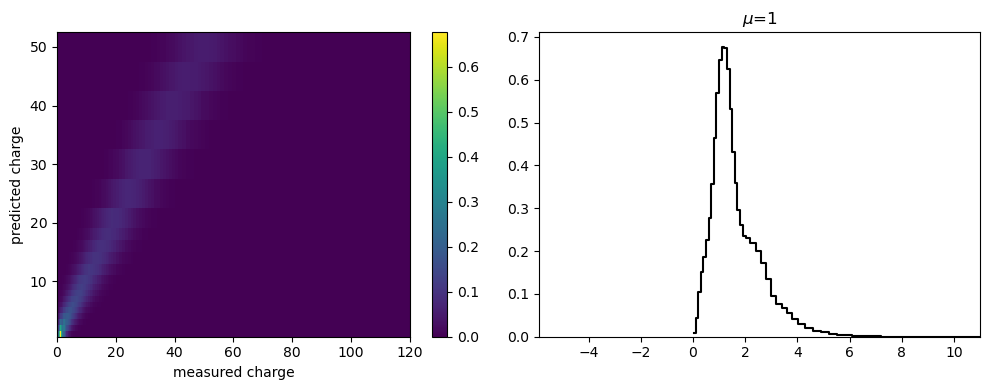

In [5]:
plt.figure(figsize=[10, 4])

# plot 2D
plt.subplot(121)
plt.pcolormesh(qbins, mubins, Hq)
plt.xlabel("measured charge")
plt.ylabel("predicted charge")
plt.colorbar()

# plot projection
plt.subplot(122)
mu = 1
index = np.digitize(mu, mubins)-1
qs  = ( qbins[1:] + qbins [:-1])/2.
plt.title(rf"$\mu$={mu}")
plt.step(qs, Hq[index], color="k", where="mid")
plt.xlim([None, mu+np.sqrt(mu)*10])
plt.ylim([0, None])

plt.tight_layout()

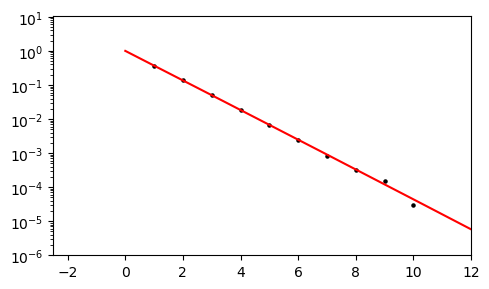

In [30]:
def PUnhit_func(x, a1, a2, a3):
    return (1. + a1*x + a2*x**2 + a3*x**3)*np.exp(-x)

plt.figure()
plt.scatter(mus, PUnhit, color="k", s=5)
x = np.linspace(0, np.max(mus), 1000)
plt.plot(x, PUnhit_func(x, *pars[:3]), color="r")
plt.xlim([None, 12])
plt.yscale("log")
plt.ylim([1e-6, None])
plt.tight_layout()